In [3]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import time
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from activation_functions import *
from optimizer_functions import *
from cost_functions import *

In [4]:
n = 100
random.seed(6)

x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

Text(0.5, 1.0, 'Comparing GD with and without momentum')

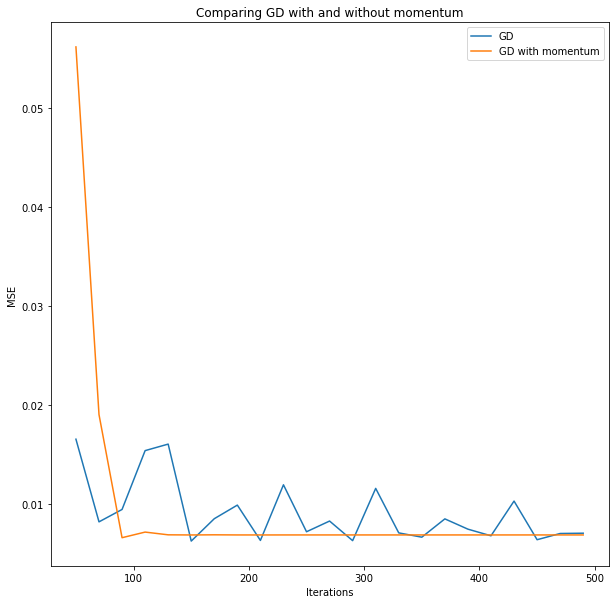

In [5]:
n_its_list = np.arange(50,510,20)
eta=0.015

MSE1_list = []
MSE2_list = []

for n_its in n_its_list:
    betas1 = gradient_descent(Xtrain, ytrain, eta, n_its)
    betas2 = gradient_descent_with_momentum(Xtrain,ytrain,eta,delta=0.9,n_its=n_its)
    MSE1_list.append(mse(ytest,Xtest @ betas1))
    MSE2_list.append(mse(ytest,Xtest @ betas2))

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="GD")
plt.plot(n_its_list,MSE2_list,label="GD with momentum")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing GD with and without momentum")
#plt.savefig("Comparing GD with and without momentum.png")

Text(0.5, 1.0, 'GD changing momentum parameter')

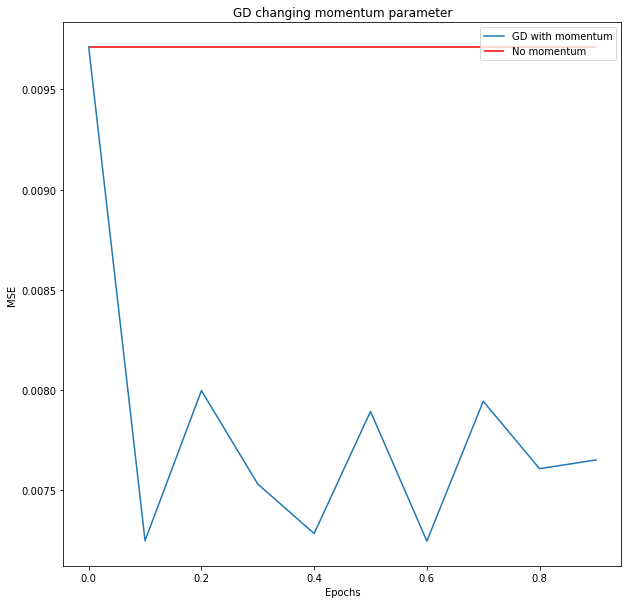

In [6]:
# gd with momentum delta

n = 100
random.seed(6)

x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 200
eta=0.015
delta_list = np.arange(0,1,0.1)

MSE_list = {delta:0 for delta in delta_list}

for delta in delta_list:

    betas = gradient_descent_with_momentum(Xtrain, ytrain, eta, delta=delta, n_its=n_its)

    MSE_list[delta] = mse(ytest,Xtest @ betas)

fig = plt.figure(figsize = (10,10))
plt.plot(delta_list,MSE_list.values(),label="GD with momentum")
plt.hlines(MSE_list[0],min(delta_list),max(delta_list),label="No momentum",color='r')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("GD changing momentum parameter")
#plt.savefig("GD changing momentum parameter.png")


Text(0.5, 1.0, 'Comparing GD and SGD')

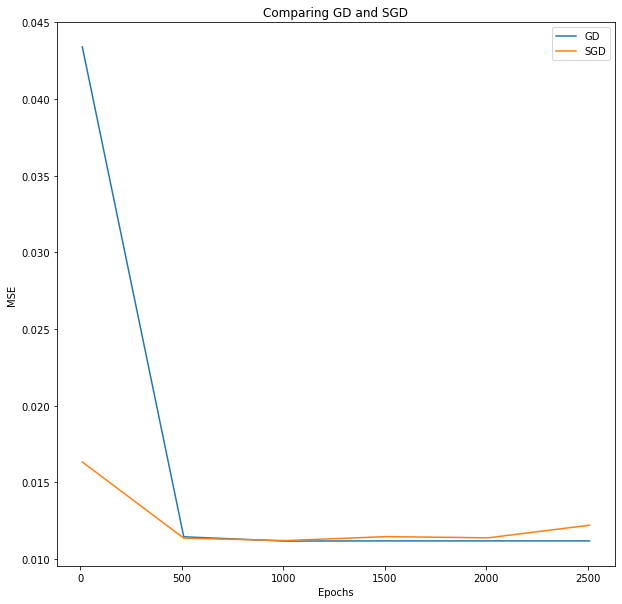

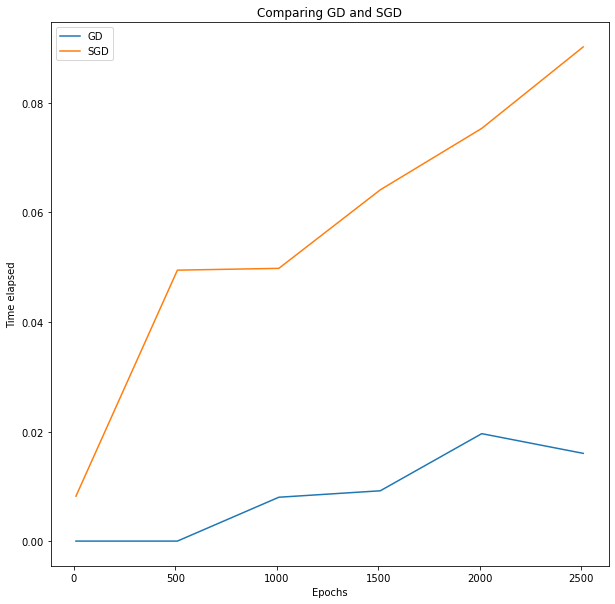

In [7]:
# GD e SGD

n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(10,3010,500)
eta=0.015
MSE1_list = []
MSE2_list = []
time1_list = []
time2_list = []

for n_its in n_its_list:
    t = time.time()
    betas1 = gradient_descent(Xtrain, ytrain, eta, n_its)
    time1_list.append(time.time()-t)
    t = time.time()
    betas2 = stochastic_gradient_descent(Xtrain,ytrain,eta,n_its,20)
    time2_list.append(time.time()-t)
    MSE1_list.append(mse(ytest,Xtest @ betas1))
    MSE2_list.append(mse(ytest,Xtest @ betas2))

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="GD")
plt.plot(n_its_list,MSE2_list,label="SGD")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing GD and SGD")
#plt.savefig("Comparing GD and SGD.png")

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,time1_list,label="GD")
plt.plot(n_its_list,time2_list,label="SGD")
plt.xlabel("Epochs")
plt.ylabel("Time elapsed")
plt.legend()
plt.title("Comparing GD and SGD")
#plt.savefig("Comparing GD and SGD.png")

In [8]:
# comparing different learning rate methods

n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(500,3500,500)
eta=0.015
MSE1_list = np.zeros(len(n_its_list))
MSE2_list = np.zeros(len(n_its_list))
MSE3_list = np.zeros(len(n_its_list))
MSE4_list = np.zeros(len(n_its_list))


for i in range(len(n_its_list)):

    n_its = n_its_list[i]

    betas1 = stochastic_gradient_descent(Xtrain,ytrain,eta,n_its,20)
    betas2 = stochastic_gradient_descent_with_adagrad(Xtrain,ytrain,eta, 0.9 ,n_its, 20)
    betas3 = stochastic_gradient_descent_with_adam(Xtrain,ytrain,eta, 0.9, 0.9, 0.99,n_its,20)
    betas4 = stochastic_gradient_descent_with_rmsprop(Xtrain,ytrain,eta, 0.9, 0.9,n_its,20)

    MSE1_list[i] = (mse(ytest,Xtest @ betas1))
    MSE2_list[i] = (mse(ytest,Xtest @ betas2))
    MSE3_list[i] = (mse(ytest,Xtest @ betas3))
    MSE4_list[i] = (mse(ytest,Xtest @ betas4))

Text(0.5, 1.0, 'Comparing learning rate adapting methods')

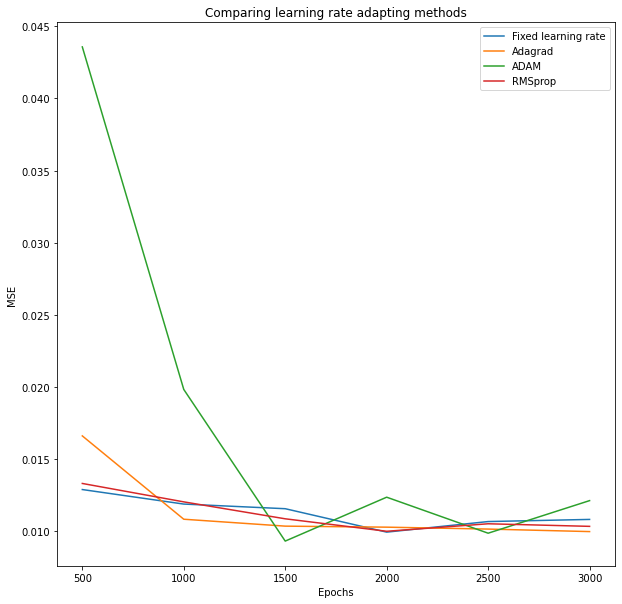

In [9]:
fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="Fixed learning rate")
plt.plot(n_its_list,MSE2_list,label="Adagrad")
plt.plot(n_its_list,MSE3_list,label="ADAM")
plt.plot(n_its_list,MSE4_list,label="RMSprop")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing learning rate adapting methods")
#plt.savefig("Comparing learning rate adapting methods.png")

In [10]:
#gridsearch (batch size, learning rate)

batch_sizes = [1,5,10,20,50]
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]

MSE = np.zeros((len(batch_sizes), len(eta_list)))

for i in range(len(batch_sizes)):
    batch_size = batch_sizes[i]
    for j in range(len(eta_list)):
        eta = eta_list[j]
        betas = stochastic_gradient_descent(X,y,eta,100,batch_size)
        MSE[i,j] =  mse(ytest,Xtest @ betas)

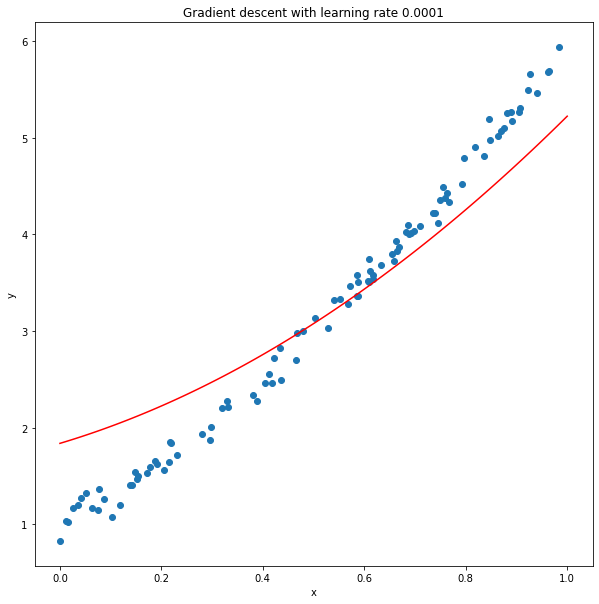

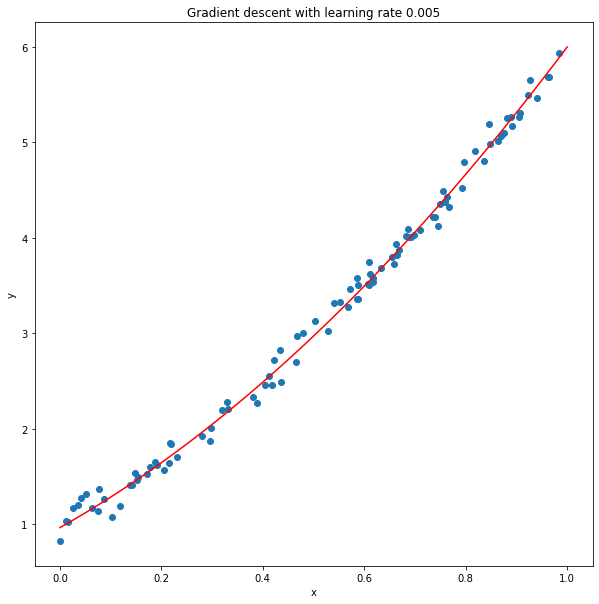

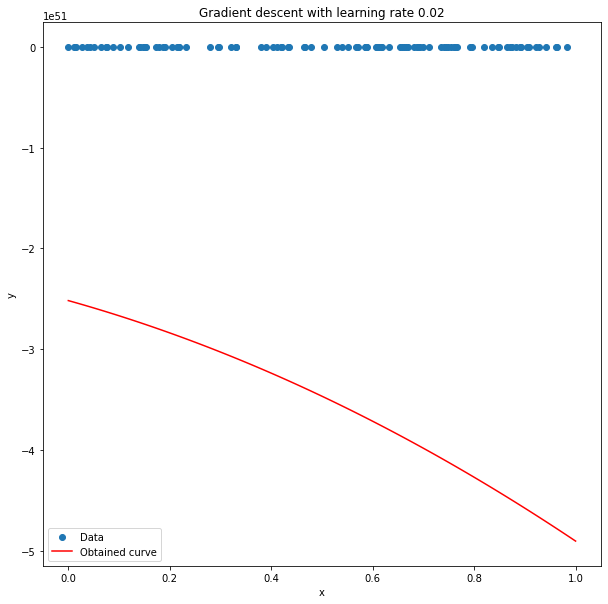

In [11]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)


X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 500
eta_list = [0.0001, 0.005, 0.02]

for eta in eta_list:
    betas = gradient_descent(Xtrain, ytrain, eta, n_its)
    ypred = Xtest @ betas

    fig = plt.figure(figsize = (10,10))
    plt.scatter(x,y,label="Data")
    plt.plot(x_lins, betas[0] + betas[1]*x_lins + betas[2]*x_lins**2, 'r',label="Obtained curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Gradient descent with learning rate " + str(eta))
plt.legend()

Text(0.5, 0, 'Iterations')

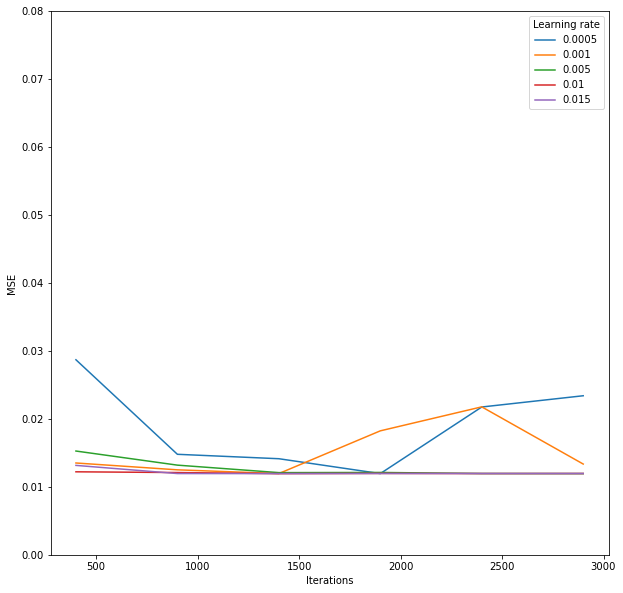

In [12]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(400,3001,500)
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]
MSE = np.zeros((len(n_its_list),len(eta_list)))

for i in range(len(n_its_list)):
    for j in range(len(eta_list)):
        
        n_its = n_its_list[i]
        eta = eta_list[j]

        betas = gradient_descent(Xtrain, ytrain, eta, n_its)
        ypred = Xtest @ betas
        MSE[i][j] = mse(ytest,ypred)

fig = plt.figure(figsize = (10,10))
for j in range(len(eta_list)):
    plt.plot(n_its_list,MSE[:,j], label = str(eta_list[j]))
plt.legend(title ="Learning rate")
plt.ylim((0,0.08))
plt.ylabel("MSE")
plt.xlabel("Iterations")
#plt.savefig("epochs_eta_mse_gradient_descent.png")

Text(0.5, 1.0, 'MSE grid search for learning rate and epochs')

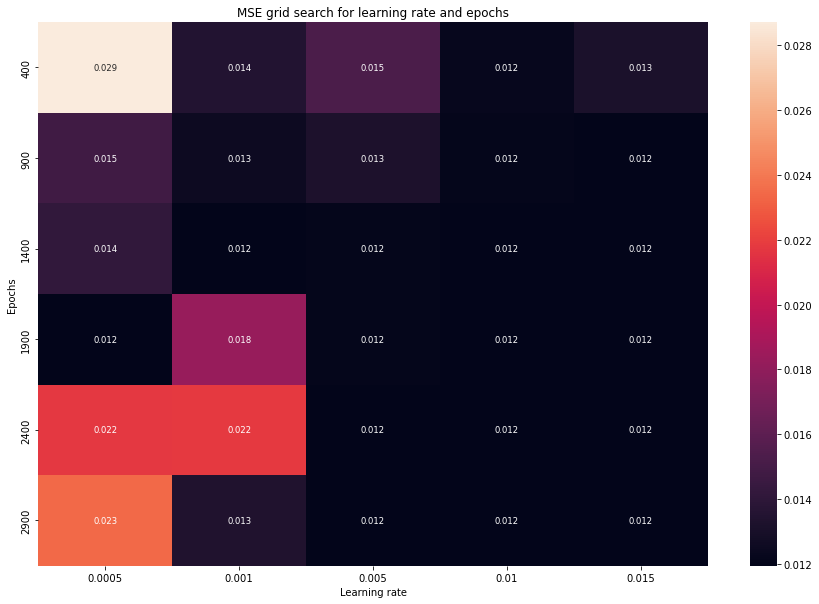

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE, xticklabels=eta_list, yticklabels=n_its_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.xlabel("Learning rate")
plt.ylabel("Epochs")
plt.title("MSE grid search for learning rate and epochs")
#plt.savefig("Grid search for learning rate and epochs.png")

Text(0, 0.5, 'Beta0')

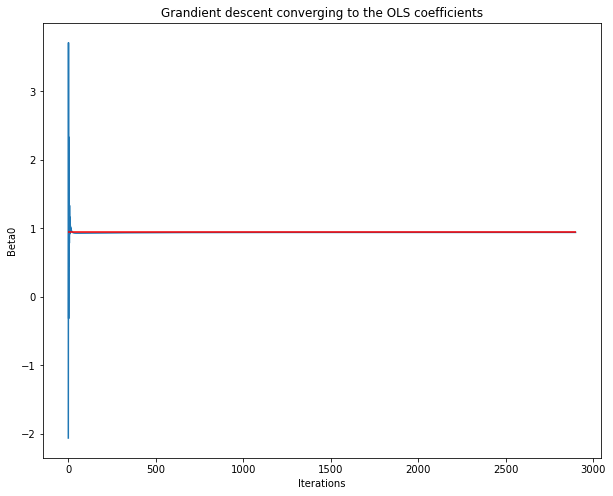

In [14]:
OLSbetas = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ ytrain
betas = np.zeros((np.shape(X)[1],n_its+1))

# initialize betas randomly
betas[:,0] = np.squeeze(np.random.randn(np.shape(X)[1],1))
eta = 0.015

for iter in range(n_its):
    gradient = Xtrain.T @ (Xtrain @ betas[:,iter]-ytrain.T).T
    betas[:,iter+1] = betas[:,iter] - eta*gradient.T

fig = plt.figure(figsize = (10,8))
plt.plot(range(n_its+1), betas[0,:])
plt.hlines(OLSbetas[0],0,n_its,'r')
plt.title("Grandient descent converging to the OLS coefficients")
plt.xlabel("Iterations")
plt.xlabel("Iterations")
plt.ylabel("Beta0")
#plt.savefig("gradient_descent_converge_OLS.png")